<a href="https://colab.research.google.com/github/SantoshMahara/-Linear-Regression-Implementation/blob/main/LinearRegHandson_Aug3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression Handson**

# Problem Statement
Insurance premiums are often based on various factors that in the end decide the amount that will be covered from the insurance company.
As a data analyst/scientist you are given a set of historical data for an organizations customers and the respective charges that were levied upon the insurance company.

The data gives you the information about the users including their age, sex, bmi, hospitalization history, annual income, etc. Analyze and gather insights fron the data and
create a linear regression model that will best predict the insurance charges for a new set of data.

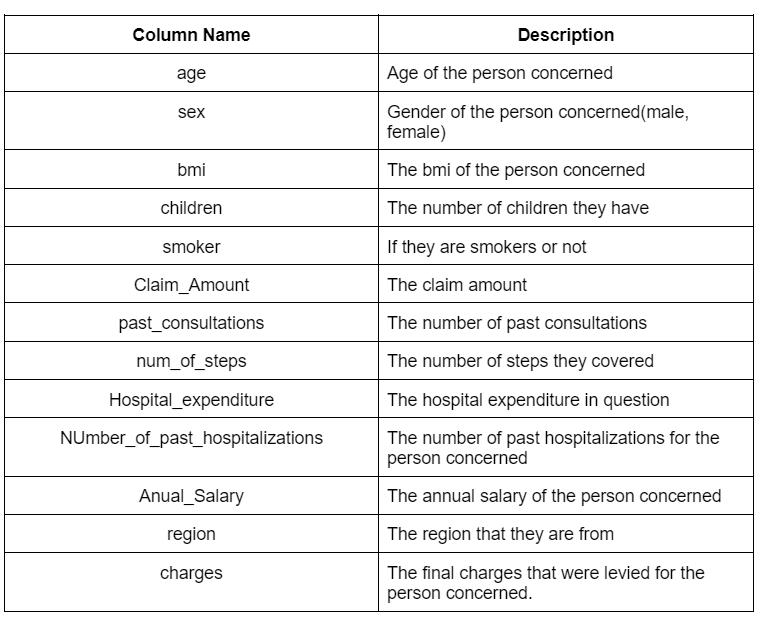

**1. Define the Problem**

`Objective:` Clearly define the problem you want to solve.

`Outcome:` Determine the outcome you want to predict (e.g., classification, regression).

**2. Data Collection**

`Gather Data:` Collect data from various sources.

`Data Relevance:` Ensure the data is relevant to the problem.

**3. Data Exploration and Cleaning**
`Exploratory Data Analysis (EDA):` Use statistical summaries and visualization techniques to understand the data.

`Handle Missing Values:` Impute or remove missing values.

`Remove Outliers:` Identify and handle outliers.

`Feature Engineering:` Create new features from existing data if necessary.

**4. Data Preprocessing**
`Data Transformation:` Normalize or standardize the data.
`Encoding Categorical Variables:` Convert categorical data to numerical values (e.g., one-hot encoding).
`Feature Scaling:` Scale features to ensure they contribute equally to the model.

5. Feature Selection
Select Relevant Features: Choose the most relevant features that contribute to the predictive power of the model.
Dimensionality Reduction: Apply techniques like PCA if needed.
6. Data Splitting
Train-Test Split: Split the data into training and testing sets.
Cross-Validation: Further split the training set into folds for cross-validation to ensure the model's generalizability.
7. Choose a Model
Model Selection: Choose the appropriate machine learning algorithm(s) based on the problem and data characteristics.
Baseline Model: Start with a simple model to set a baseline for performance.
8. Model Training
Train the Model: Fit the model to the training data.
Hyperparameter Tuning: Optimize hyperparameters using techniques like grid search or random search.
9. Model Evaluation
Evaluate on Test Set: Assess the model's performance on the test data.
Performance Metrics: Use appropriate metrics (e.g., accuracy, precision, recall, F1 score, RMSE) to evaluate the model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/new_insurance_data.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
df.head() #to see the first 5 rows of the data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
df.head(6) #to see 6 rows

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110
5,18.0,male,34.43,0.0,no,26488.33912,20.0,717162.0,3696160.701,0.0,NaN,southeast,1137.4697


In [ ]:
df.tail() #to see the last 5 rows

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [ ]:
df.columns #to see the columns of the dataset

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
df.shape #to see the number of rows and columns

(1338, 13)

In [ ]:
df.info() #gives information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
df.describe() #statistical summarry

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [ ]:
df.isnull().sum() #to see the null value count

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
df.duplicated().sum() #to check the duplicates

0

In [ ]:
df['age'].mean() #mean of the column

39.31000752445448

In [ ]:
df['age'].median() #median of the column

39.0

In [ ]:
df['smoker'].mode()

,smoker
0,no


In [ ]:
df['smoker'].mode()[0]

'no'

In [ ]:
# df.fillna(df['age'].mean()) #to fill the null values

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
col=list(df.columns)

In [ ]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [ ]:
df['sex'].mode()[0]

'male'

In [ ]:
# df.dtypes

In [ ]:
for col_name in col:
  if df[col_name].dtypes=='object':
    df[col_name]=df[col_name].fillna(df[col_name].mode()[0]) #fill the object with mode
  else:
    df[col_name]=df[col_name].fillna(df[col_name].mean()) #fill the numerical with mean

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


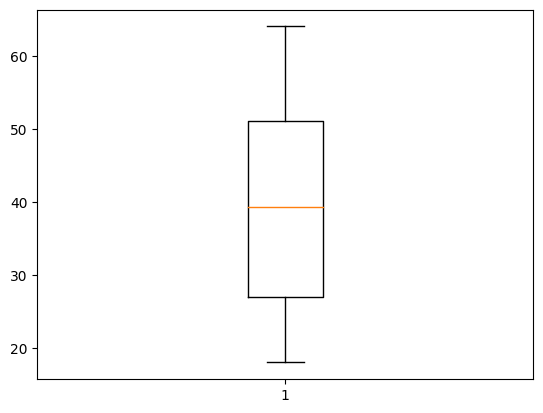

In [ ]:
plt.boxplot(df['age'])
plt.show()

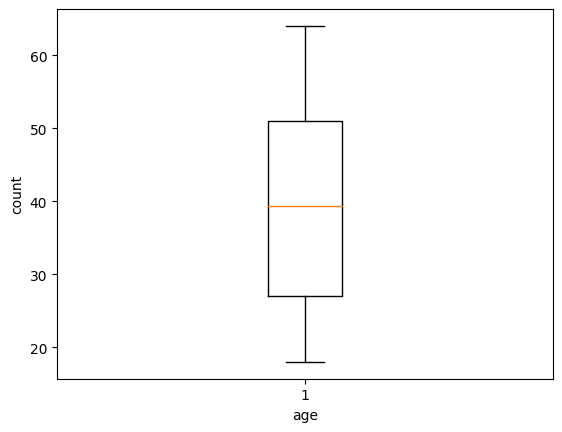

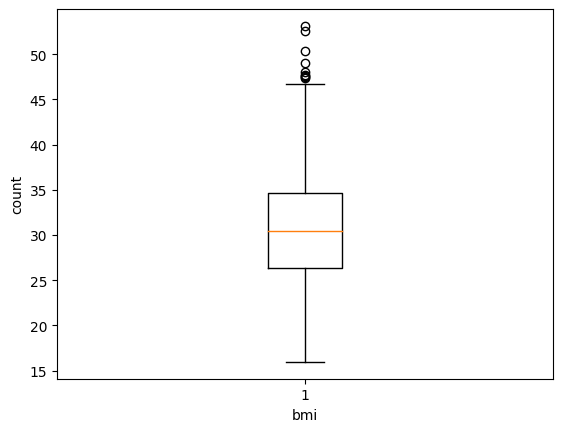

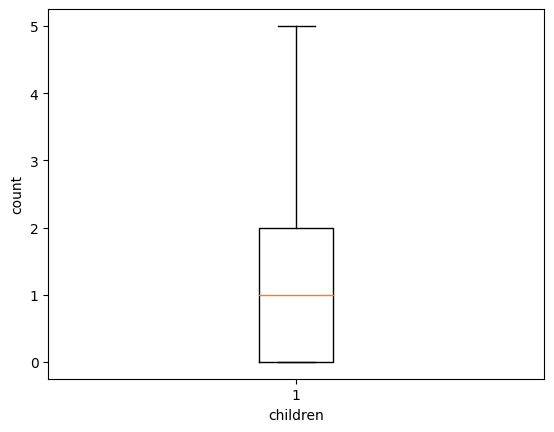

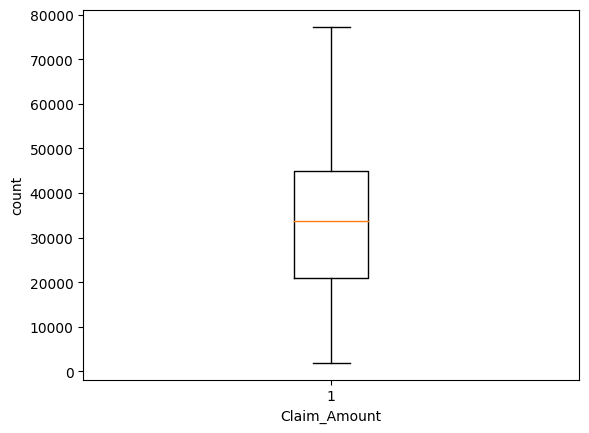

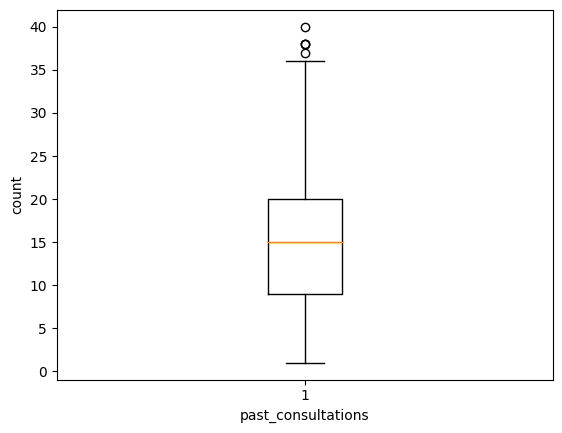

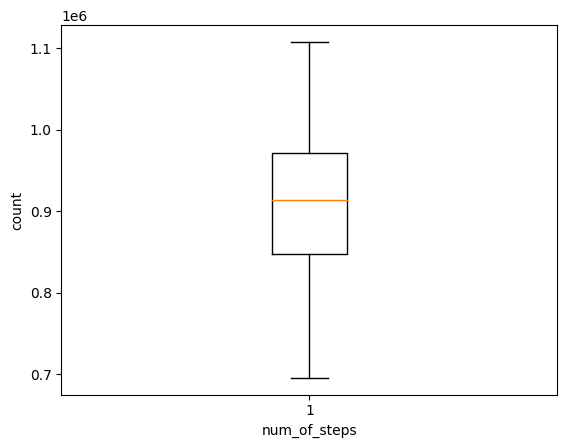

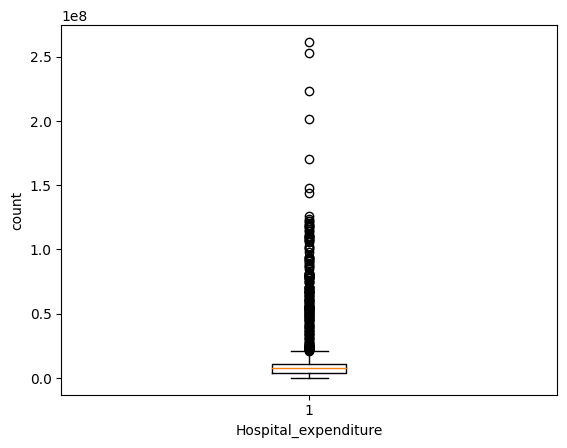

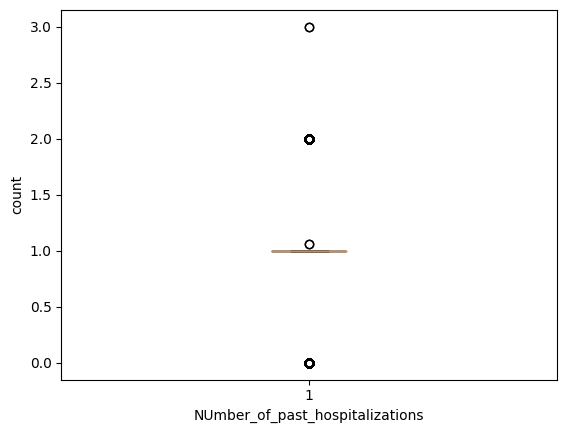

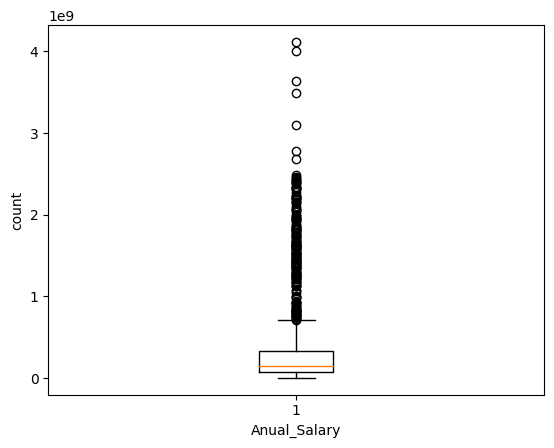

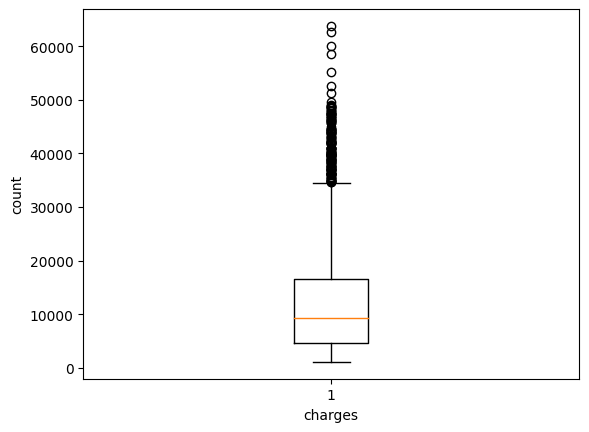

In [ ]:
for col_name in col:
  if(df[col_name].dtypes!='object'):
    plt.boxplot(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

**Resolving Outliers**

*   Find Q1 and Q3
*   Then find IQR
*   Then find the Lower Limit and Upper Limit
*   Filter the data



In [ ]:
#BMI
Q1=df.bmi.quantile(0.25)
Q3=df.bmi.quantile(0.75)

In [ ]:
Q1

26.315

In [ ]:
Q3

34.65625

In [ ]:
IQR=Q3-Q1

In [ ]:
IQR

8.341249999999999

In [ ]:
#Lower fence
LL=Q1-1.5*IQR

In [ ]:
#Upper fence
UL=Q3+1.5*IQR

In [ ]:
LL

13.803125000000003

In [ ]:
UL

47.168124999999996

In [ ]:
df=df[(df.bmi >= LL) & (df.bmi<=UL)] #filtering the data

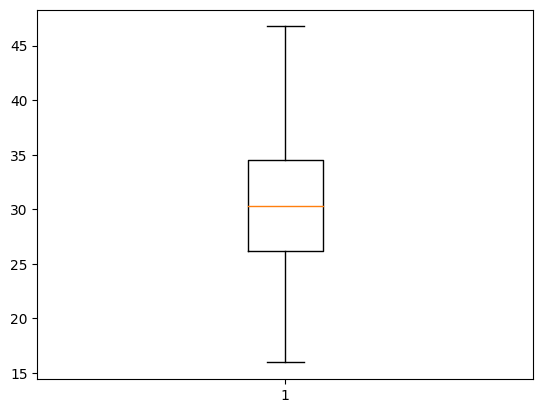

In [ ]:
plt.boxplot(df['bmi'])
plt.show()

In [ ]:
df.shape

(1329, 13)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
#past_consultations
Q1=df.past_consultations.quantile(0.25)
Q3=df.past_consultations.quantile(0.75)
IQR=Q3-Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df=df[(df.past_consultations >= LL) & (df.past_consultations<=UL)] #filtering the data

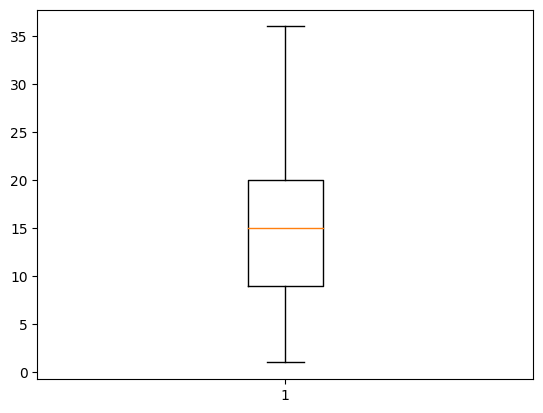

In [ ]:
plt.boxplot(df['past_consultations'])
plt.show()

In [ ]:
#Hospital_expenditure
Q1=df.Hospital_expenditure.quantile(0.25)
Q3=df.Hospital_expenditure.quantile(0.75)
IQR=Q3-Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df=df[(df.Hospital_expenditure >= LL) & (df.Hospital_expenditure<=UL)] #filtering the data

In [ ]:
Q1

3316227.5160000003

In [ ]:
Q3

8496163.276

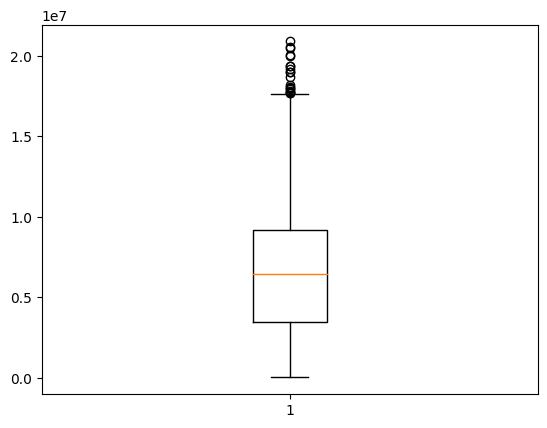

In [ ]:
plt.boxplot(df['Hospital_expenditure'])
plt.show()

In [ ]:
#Anual_Salary
Q1=df.Anual_Salary.quantile(0.25)
Q3=df.Anual_Salary.quantile(0.75)
IQR=Q3-Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df=df[(df.Anual_Salary >= LL) & (df.Anual_Salary<=UL)] #filtering the data

In [ ]:
Q1

70527966.065

In [ ]:
Q3

197537601.5

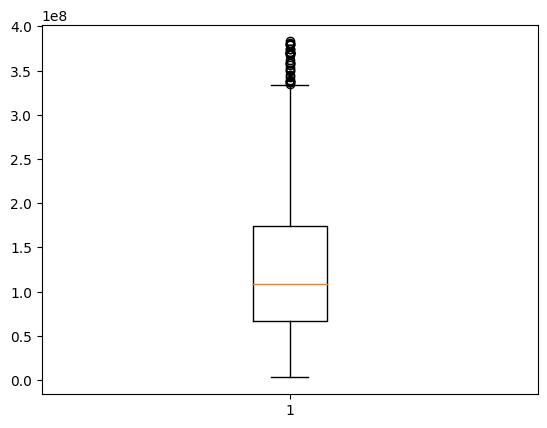

In [ ]:
plt.boxplot(df['Anual_Salary'])
plt.show()

In [ ]:
df.shape

(1030, 13)